In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Load the historical data
historical_data = pd.read_csv('../data/raw/historical_data.csv')
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%b %Y')
historical_data.head()

,type,suburb,Count,Date,Median
0,1 bedroom flat,Albert Park-Middle Park-West St Kilda,352.0,2000-03-01,165.0
1,1 bedroom flat,Armadale,210.0,2000-03-01,150.0
2,1 bedroom flat,Carlton North,87.0,2000-03-01,150.0
3,1 bedroom flat,Carlton-Parkville,303.0,2000-03-01,165.0
4,1 bedroom flat,CBD-St Kilda Rd,755.0,2000-03-01,250.0


## ARIMA Model for single suburb and property type

In [10]:
# Filter the data for a single suburb and property type
suburb = 'Carlton North'
property_type = '1 bedroom flat'
data = historical_data[(historical_data['suburb'] == suburb) & (historical_data['type'] == property_type)]

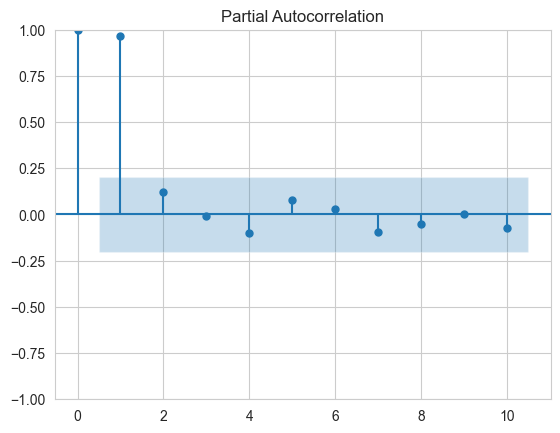

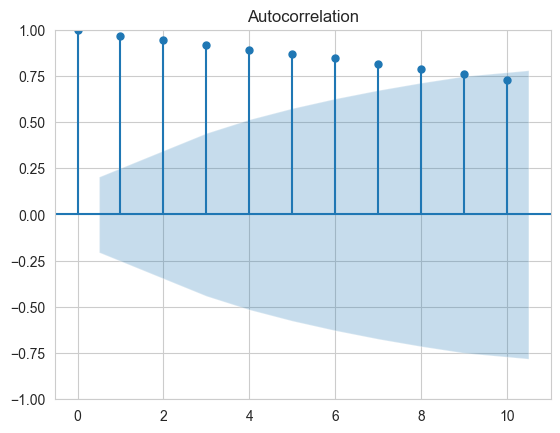

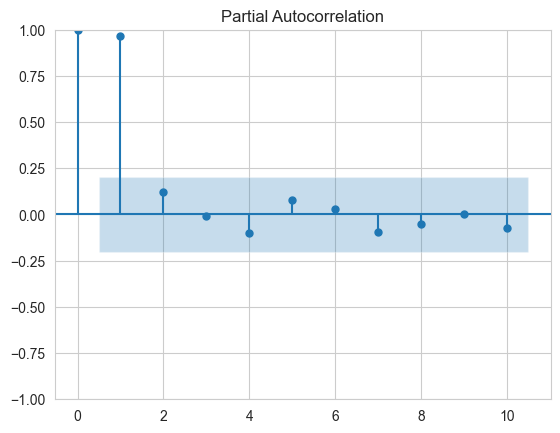

In [11]:
plot_acf(data["Median"], lags=10)
plot_pacf(data["Median"], lags=10)

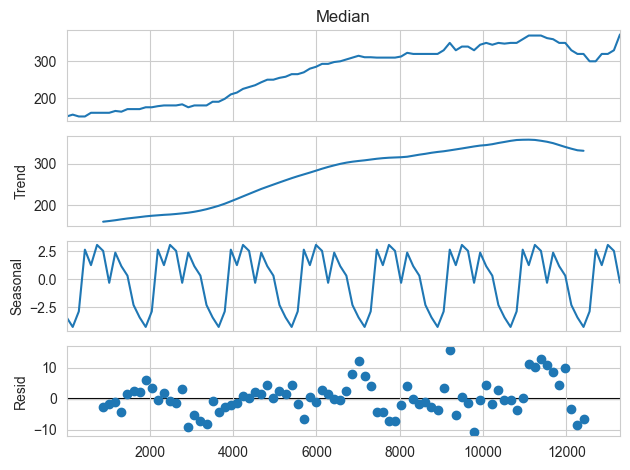

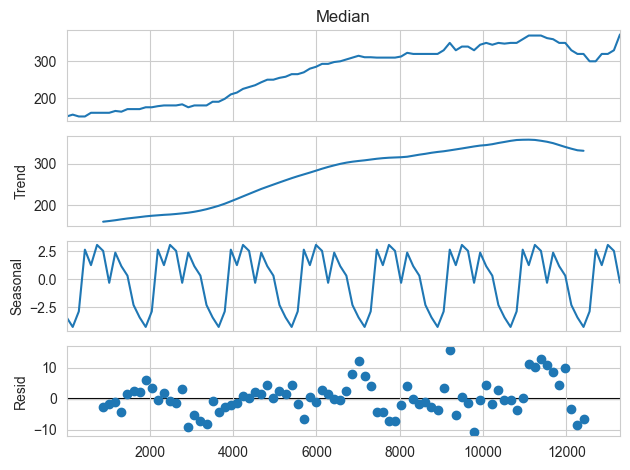

In [17]:
# Seasonal decomposition
seasonal_decompose(data["Median"], model='additive', period=12).plot()